In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import katdal
import requests # Could use the builtin urllib but Requests are nicer.
import katpoint
import time
import ast
import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable

/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [70]:
week_arr = arange(datetime.datetime(2018,4,1), datetime.datetime(2019,4,1), datetime.timedelta(days=7)).astype(datetime.datetime)

In [71]:
url="http://portal.mkat.karoo.kat.ac.za/katstore/samples" # site for the most resent values
#url='http://kat-flap-cpt.mkat.control.kat.ac.za/katstore/samples' # flap in CT for older values

In [ ]:
total_time = 7 * 24 * 3600
week_sa = zeros((4,4,52)) 

states = ['initialising','inactive','error','active']

for sa in range(4):
    for wk,start_dt,end_dt in zip(range(52),week_arr[:-1],week_arr[1:]):
        start,end = float(start_dt.strftime("%s")),float(end_dt.strftime("%s"))
        sensor = 'subarray_%d_state'%(sa+1)
        params={'sensor': sensor,  # name of the sensor.
                   'start':start, # start time in seconds - float should work.
                   'end': end+10, # end time in seconds
                   'time_type':'n', # Specify that we work in seconds. 
                   'limit':100000000}
        res = requests.get(url, params) # Make the call.
        #input_labelling = ast.literal_eval(res.json()[0][3])
        sa_lst = res.json()

        for state in range(4):
            sa1 = 0
            for i,l in enumerate(sa_lst[:-1]):
                if states[state] == l[3]:
                    sa1 += (sa_lst[i+1][2] - l[2])
            week_sa[sa,state,wk] = (sa1/1e6/(end-start) * 100)


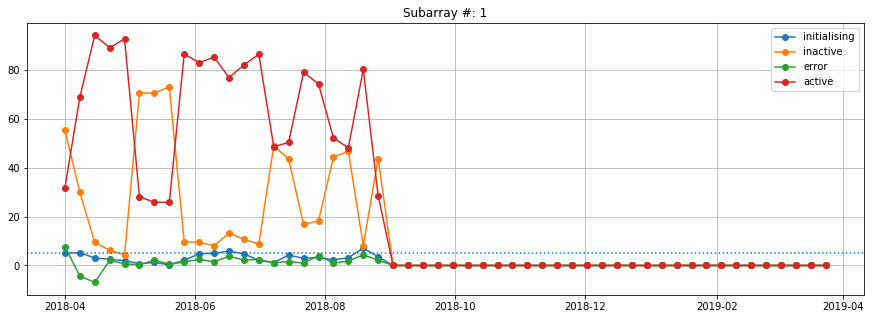

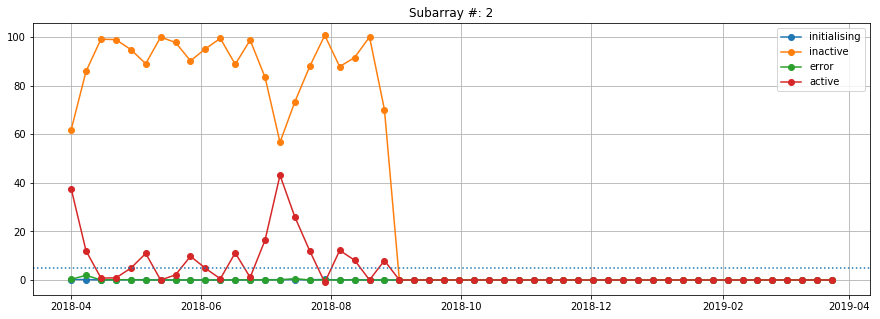

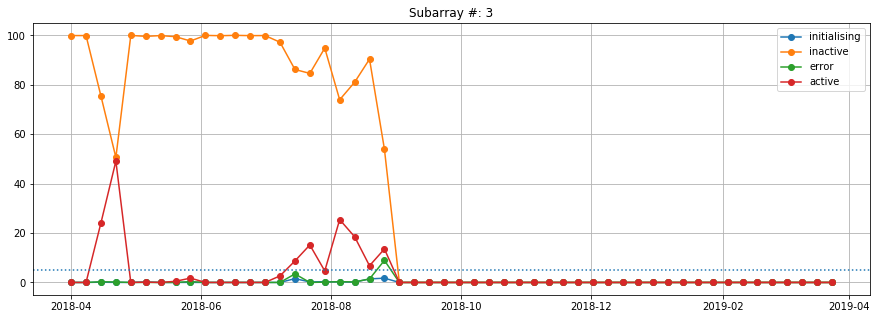

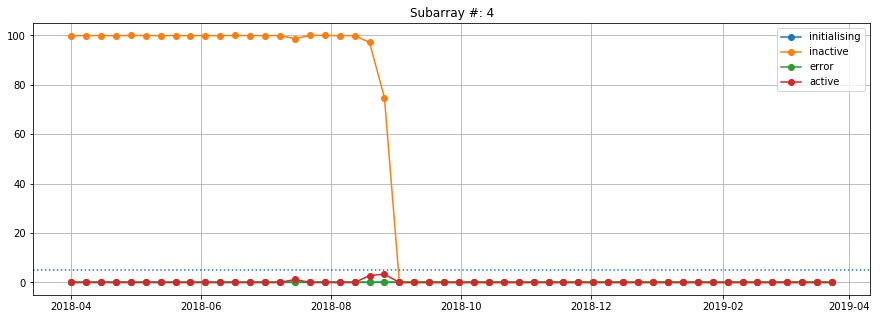

In [81]:
for sa in range(4):
    figure(figsize=(15,5))
    for state in range(4):
        plot(week_arr[:-1],week_sa[sa,state,:],"o-",label=states[state])
    grid()
    legend()
    title("Subarray #: %d"%(sa+1))
    axhline(5,linestyle=":")